In [1]:
#@title define { form-width: "30%", display-mode: "both" }
#@markdown 
import numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
import os
import seaborn as sns
import matplotlib.pyplot as plt

def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

from sklearn.preprocessing import LabelEncoder
#from sklearn.cross_validation import StratifiedShuffleSplit
#import pyeeg
import warnings
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls

from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
print(__doc__)

import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap



Automatically created module for IPython interactive environment


In [0]:
!ls

sample_data


In [2]:
#@title download dataset { form-width: "20%" }
!git clone https://github.com/ebrahim9214453/EEG-signal-classi-cation.git

Cloning into 'EEG-signal-classi-cation'...
remote: Enumerating objects: 2, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 528 (delta 0), reused 0 (delta 0), pack-reused 526
Receiving objects: 100% (528/528), 2.83 MiB | 11.12 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [3]:
%cd/content/EEG-signal-classi-cation

/content/EEG-signal-classi-cation


In [4]:
!ls

dataset  F  N  O  README.md  S	Z


In [0]:
#@title import each and every file { form-width: "30%" }


dirF="./F/"
tempF = []
for file in os.listdir(dirF):
    fl = dirF + file
    tempF.append(fl)
tempF = sorted(tempF)   

dirN="./N/"
tempN = []
for file in os.listdir(dirN):
    fl = dirN + file
    tempN.append(fl)
tempN = sorted(tempN)   
    
dirO="./O/"
tempO = []
for file in os.listdir(dirO):
    fl = dirO + file
    tempO.append(fl)
tempO = sorted(tempO)   

dirS="./S/"
tempS = []
for file in os.listdir(dirS):
    fl = dirS + file
    tempS.append(fl)
tempS = sorted(tempS) 

dirZ="./Z/"
tempZ = []
for file in os.listdir(dirZ):
    fl = dirZ + file
    tempZ.append(fl)
tempZ = sorted(tempZ)

In [0]:
#@title create small tables { form-width: "30%" }


tf=[]
st = 'A'
for i in range(len(tempF)):
    x = pd.read_table(tempF[i],header=None)
    x.columns=[st+str(i)]
    tf.append(x)
    
tn=[]
st = 'A'
for i in range(len(tempN)):
    x = pd.read_table(tempN[i],header=None)
    x.columns=[st+str(i)]
    tn.append(x)
    
to=[]
st = 'A'
for i in range(len(tempO)):
    x = pd.read_table(tempO[i],header=None)
    x.columns=[st+str(i)]
    to.append(x)

        
ts=[]
st = 'A'
for i in range(len(tempS)):
    x = pd.read_table(tempS[i],header=None)
    x.columns=[st+str(i)]
    ts.append(x)
    
tz=[]
st = 'A'
for i in range(len(tempZ)):
    x = pd.read_table(tempZ[i],header=None)
    x.columns=[st+str(i)]
    tz.append(x)

In [0]:
#@title create big table { form-width: "30%" }

def table(table):
    big_table = None
    for ta in table:
        big_table = pd.concat([big_table, ta],axis=1)
    return big_table


In [8]:
bigF = table(tf)
bigN = table(tn)
bigO = table(to)
bigS = table(ts)
bigZ = table(tz)
head = list(bigF.columns.values)
len(bigF.columns)
bigZ.head(5)

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A90,A91,A92,A93,A94,A95,A96,A97,A98,A99
0,12,-56,-37,-31,14,-87,-2,-31,8,-41,...,13,40,-19,-45,6,-133,-3,-51,56,-36
1,22,-50,-22,-43,26,-89,20,-16,17,-38,...,30,48,-1,-62,-6,-144,-3,-42,55,-71
2,35,-64,-17,-39,32,-73,42,10,29,-31,...,42,35,33,-76,-8,-113,-12,-39,38,-120
3,45,-91,-24,-39,25,-69,48,28,46,-25,...,56,5,51,-98,-6,-74,-24,-47,-5,-150
4,69,-135,-31,-9,16,-51,27,31,50,-32,...,56,-40,49,-108,15,-41,-34,-51,-47,-160


In [0]:
#@title #creat sub matrix for each # creat a matrix { form-width: "30%" }

def creat_mat(mat):
    matx = np.zeros((len(mat),(len(head))))
    for i in range(len(head)):
        matx[:,i] = mat[head[i]]
        sleep(0.01)
    return matx
# every mat contain probs mat[:,i] total 28 start form mat1

In [0]:
matF = creat_mat(bigF) 
matN = creat_mat(bigN) 
matO = creat_mat(bigO) 
matS = creat_mat(bigS) 
matZ = creat_mat(bigZ)


matF = np.nan_to_num(matF) 
matN = np.nan_to_num(matN)
matO = np.nan_to_num(matO)
matS = np.nan_to_num(matS)
matZ = np.nan_to_num(matZ)

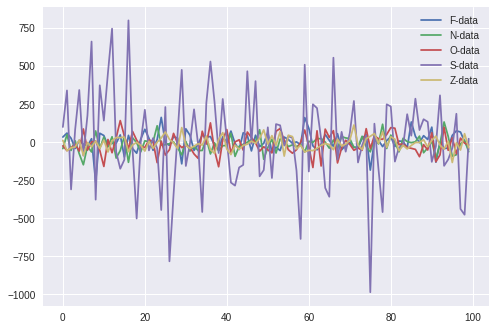

In [11]:
#@title #Visualize the Datapoints { form-width: "30%" }

FF,      = plt.plot(matF[0],label='F-data')
NN,   = plt.plot(matN[0],label='N-data')
OO, = plt.plot(matO[0],label='O-data')
SS,   = plt.plot(matS[0],label='S-data')
ZZ, = plt.plot(matZ[0],label='Z-data')

plt.legend(handles=[FF,NN,OO,SS,ZZ])
plt.savefig("fig1.png")

In [0]:
#@title DWT function { form-width: "30%" }
import pywt

def wtdata(mat):
    xcA5 = np.zeros((134,(len(head))))
    xcD5 = np.zeros((134,(len(head))))
    xcD4 = np.zeros((262,(len(head))))
    xcD3 = np.zeros((518,(len(head))))
    xcD2 = np.zeros((1029,(len(head))))
    xcD1 = np.zeros((2052,(len(head))))
    
    for i in range(len(head)):
        sleep(0.01)
        cA5, cD5,cD4, cD3, cD2, cD1= pywt.wavedec(mat[:,i], 'db4', level=5)
        xcA5[:,i]=cA5
        xcD5[:,i]=cD5
        xcD4[:,i]=cD4
        xcD3[:,i]=cD3
        xcD2[:,i]=cD2
        xcD1[:,i]=cD1

    return (xcA5, xcD5, xcD4, xcD3, xcD2, xcD1)

In [0]:
#@title #create features of class S & Z { form-width: "30%" }

f1_S    = np.zeros((100,4))
f2_S    = np.zeros((100,4))
f3_S    = np.zeros((100,4))
f4_S    = np.zeros((100,4))
cl_S    = np.ones((100,1)) 
# create features of class Z
f1_Z    = np.zeros((100,4))
f2_Z    = np.zeros((100,4))
f3_Z    = np.zeros((100,4))
f4_Z    = np.zeros((100,4))
cl_Z    = np.zeros((100,1)) 


  

In [0]:
#@title Feature extraction S { form-width: "30%" }
power=0
div=0
rat=0
xcA5, xcD5, xcD4, xcD3, xcD2, xcD1=wtdata(matS)
for i in range(len(head)):
      f1_S[i,0]=numpy.mean(abs(xcA5[:,i]))
      for j in range(len(head)):
        power=power+xcA5[j,i]**2
      f2_S[i,0]=power
      power=0
      for k in range(len(head)):
        div=div+(xcA5[k,i]-numpy.mean(xcA5[:,i]))**2
        f3_S[i,0]=div
        div=0
      f1_S[i,1]=numpy.mean(abs(xcD5[:,i]))
      for j in range(len(head)):
        power=power+xcD5[j,i]**2
      f2_S[i,1]=power
      power=0
      for k in range(len(head)):
        div=div+(xcD5[k,i]-numpy.mean(xcD5[:,i]))**2
        f3_S[i,1]=div
        div=0
      f1_S[i,2]=numpy.mean(abs(xcD4[:,i]))
      for j in range(len(head)):
        power=power+xcD4[j,i]**2
      f2_S[i,2]=power
      power=0
      for k in range(len(head)):
        div=div+(xcD4[k,i]-numpy.mean(xcD4[:,i]))**2
        f3_S[i,2]=div
        div=0
      f1_S[i,3]=numpy.mean(abs(xcD3[:,i]))
      for j in range(len(head)):
        power=power+xcD3[j,i]**2
      f2_S[i,3]=power
      power=0
      for k in range(len(head)):
        div=div+(xcD3[k,i]-numpy.mean(xcD3[:,i]))**2
        f3_S[i,3]=div
        div=0
              
          
for i in range(len(head)-1):
        f4_S[i,0]=(f1_S[i,0])/(f1_S[i+1,0])
        f4_S[i,1]=(f1_S[i,1])/(f1_S[i+1,1])
        f4_S[i,2]=(f1_S[i,2])/(f1_S[i+1,2])
        f4_S[i,3]=(f1_S[i,3])/(f1_S[i+1,3])
        
      
f4_S[len(head)-1,0]=numpy.mean(f4_S[:,0])
f4_S[len(head)-1,1]=numpy.mean(f4_S[:,0])
f4_S[len(head)-1,2]=numpy.mean(f4_S[:,0])
f4_S[len(head)-1,3]=numpy.mean(f4_S[:,0])  

In [0]:
#@title Feature extraction Z { form-width: "30%" }

xcA5, xcD5, xcD4, xcD3, xcD2, xcD1=wtdata(matZ)
for i in range(len(head)):
      f1_Z[i,0]=numpy.mean(abs(xcA5[:,i]))
      for j in range(len(head)):
        power=power+xcA5[j,i]**2
      f2_Z[i,0]=power
      power=0
      for k in range(len(head)):
        div=div+(xcA5[k,i]-numpy.mean(xcA5[:,i]))**2
        f3_Z[i,0]=div
        div=0
      f1_Z[i,1]=numpy.mean(abs(xcD5[:,i]))
      for j in range(len(head)):
        power=power+xcD5[j,i]**2
      f2_Z[i,1]=power
      power=0
      for k in range(len(head)):
        div=div+(xcD5[k,i]-numpy.mean(xcD5[:,i]))**2
        f3_Z[i,1]=div
        div=0
      f1_Z[i,2]=numpy.mean(abs(xcD4[:,i]))
      for j in range(len(head)):
        power=power+xcD4[j,i]**2
      f2_Z[i,2]=power
      power=0
      for k in range(len(head)):
        div=div+(xcD4[k,i]-numpy.mean(xcD4[:,i]))**2
        f3_Z[i,2]=div
        div=0
      f1_Z[i,3]=numpy.mean(abs(xcD3[:,i]))
      for j in range(len(head)):
        power=power+xcD3[j,i]**2
      f2_Z[i,3]=power
      power=0
      for k in range(len(head)):
        div=div+(xcD3[k,i]-numpy.mean(xcD3[:,i]))**2
        f3_Z[i,3]=div
        div=0
     # f1_Z[i,4]=numpy.mean(abs(xcD2[:,i]))
     # for j in range(len(head)):
      #  power=power+xcD2[j,i]**2
      #f2_Z[i,4]=power
      #power=0
      #for k in range(len(head)):
       # div=div+(xcD2[k,i]-f1_Z[i,4])**2
        #f3_Z[i,4]=div
        #div=0
      #f1_Z[i,5]=numpy.mean(abs(xcD1[:,i]))
    #  for j in range(len(head)):
     #   power=power+xcD1[j,i]**2
      #f2_Z[i,5]=power
      #power=0
    #  for k in range(len(head)):
     #   div=div+(xcD1[k,i]-f1_Z[i,5])**2
      #  f3_Z[i,5]=div
       # div=0
for i in range(len(head)-1):
        f4_Z[i,0]=(f1_Z[i,0])/(f1_Z[i+1,0])
        f4_Z[i,1]=(f1_Z[i,1])/(f1_Z[i+1,1])
        f4_Z[i,2]=(f1_Z[i,2])/(f1_Z[i+1,2])
        f4_Z[i,3]=(f1_Z[i,3])/(f1_Z[i+1,3])
        
f4_Z[len(head)-1,0]=numpy.mean(f4_Z[:,0])
f4_Z[len(head)-1,1]=numpy.mean(f4_Z[:,0])
f4_Z[len(head)-1,2]=numpy.mean(f4_Z[:,0])
f4_Z[len(head)-1,3]=numpy.mean(f4_Z[:,0])      

In [0]:
#@title StandardScaler { form-width: "30%" }
M_S_E = np.concatenate([f1_S,f2_S,f3_S,f4_S],axis=1)
M_Z_A = np.concatenate([f1_Z,f2_Z,f3_Z,f4_Z],axis=1)


from sklearn.preprocessing import StandardScaler
M_S_E = StandardScaler().fit_transform(M_S_E)
M_Z_A = StandardScaler().fit_transform(M_Z_A)





In [91]:
#@title calcluated n_component { form-width: "30%" }
k=0
cov_mat = np.cov(M_S_E.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
#print('Eigenvectors \n%s' %eig_vecs)
eig_vals=eig_vals*100/16
for i in range(len(eig_vals)):
  k=k+eig_vals[i]
  if 95<=k:
    print("%s=n component is best"%(i+1))
    



8=n component is best
9=n component is best
10=n component is best
11=n component is best
12=n component is best
13=n component is best
14=n component is best
15=n component is best
16=n component is best


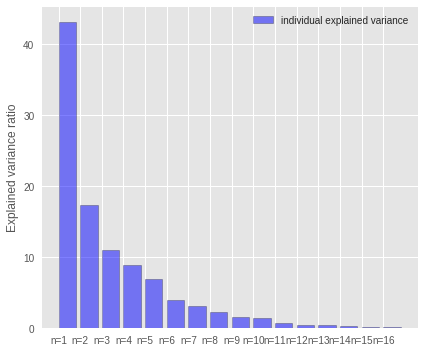

In [93]:

with plt.style.context('ggplot'):
    
    
    fig = plt.figure(figsize=(6,5))
    
    objects = ('n=1', 'n=2', 'n=3', 'n=4', 'n=5', 'n=6','n=7', 'n=8', 'n=9', 'n=10', 'n=11', 'n=12','n=13', 'n=14', 'n=15', 'n=16')
    y_pos = np.arange(len(objects))
    plt.bar( y_pos,eig_vals , alpha=0.5, align= 'edge',label='individual explained variance',edgecolor='k',facecolor='b')
    plt.xticks(y_pos, objects)
    plt.ylabel('Explained variance ratio')
    
    plt.legend(loc='best')
    plt.tight_layout()

In [0]:
#@title PCA & ICA matrix { form-width: "30%" }
pca = PCA(n_components=8)
pca.fit( M_S_E)
M_S_E_pca=pca.transform(M_S_E)
pca.fit( M_Z_A)
M_Z_A_pca=pca.transform(M_Z_A)

ica = FastICA(n_components=8)
ica.fit( M_S_E)
M_S_E_ica=ica.transform(M_S_E)
ica.fit( M_Z_A)
M_Z_A_ica=pca.transform(M_Z_A)




In [43]:
M_Z_A_ica.shape

(100, 8)

In [44]:
#@title label of feature { form-width: "30%" }
MftS_E_pca = np.concatenate([M_S_E_pca,cl_S],axis=1)
MftZ_A_pca = np.concatenate([M_Z_A_pca,cl_Z],axis=1)

FCM_A_pca = pd.DataFrame(MftZ_A_pca,columns=['f1','f2','f3','f4','f5','f6','f7','f8','class'])
FCM_E_pca = pd.DataFrame(MftS_E_pca,columns=['f1','f2','f3','f4','f5','f6','f7','f8','class'])

MftS_E_ica = np.concatenate([M_S_E_ica,cl_S],axis=1)
MftZ_A_ica = np.concatenate([M_Z_A_ica,cl_Z],axis=1)

FCM_A_ica = pd.DataFrame(MftZ_A_ica,columns=['f1','f2','f3','f4','f5','f6','f7','f8','class'])
FCM_E_ica = pd.DataFrame(MftS_E_ica,columns=['f1','f2','f3','f4','f5','f6','f7','f8','class'])

MftS_E_lda = np.concatenate([M_S_E,cl_S],axis=1)

MftZ_A_lda = np.concatenate([M_Z_A,cl_Z],axis=1)

FCM_E_lda = pd.DataFrame(MftS_E_lda,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','class'])
FCM_A_lda = pd.DataFrame(MftZ_A_lda,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','class'])

FCM_A_ica.head(5)



,f1,f2,f3,f4,f5,f6,f7,f8,class
0,-0.283880,-1.160639,-1.009540,0.867348,-0.147925,-0.031405,-1.125429,-0.556381,0.0
1,-3.193156,3.703859,-1.010242,1.119306,-0.362617,1.382599,0.382286,-1.095002,0.0
2,-0.796188,0.366423,-1.051785,0.226354,-0.726620,0.254399,-1.123346,-0.864419,0.0
3,-3.211432,-0.332778,-0.971737,0.253705,-1.448387,-1.625569,0.983952,-0.459156,0.0
4,0.153036,-0.408617,-0.359377,-0.009996,-0.592514,-0.462531,-0.500209,-0.163907,0.0


In [0]:
#@title concatenate each class { form-width: "30%" }
TotalDataset_pca = pd.concat([FCM_A_pca,FCM_E_pca],ignore_index=False)

TotalDataset_ica = pd.concat([FCM_A_ica,FCM_E_ica],ignore_index=False)

TotalDataset_lda = pd.concat([FCM_A_lda,FCM_E_lda],ignore_index=False)



In [0]:
#@title PCA__Split arrays or matrices into random train and test subsets { form-width: "35%" }

X = TotalDataset_pca[['f1','f2','f3','f4','f5','f6','f7','f8']]
y = TotalDataset_pca[['class']]
X = np.asarray(X)
y = np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [47]:
#@title SVM+PCA { form-width: "30%" }
from sklearn.svm import SVC  
svclassifier = SVC(C=1000,gamma=1)  
svclassifier.fit(X_train, y_train)  
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[50  1]
 [24 25]]
              precision    recall  f1-score   support

         0.0       0.68      0.98      0.80        51
         1.0       0.96      0.51      0.67        49

   micro avg       0.75      0.75      0.75       100
   macro avg       0.82      0.75      0.73       100
weighted avg       0.82      0.75      0.73       100



In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [31]:
import sklearn
sklearn.__version__

'0.20.2'

KNN: 0.700000 (0.137840)
CART: 0.630000 (0.107703)
SVM: 0.755000 (0.121347)


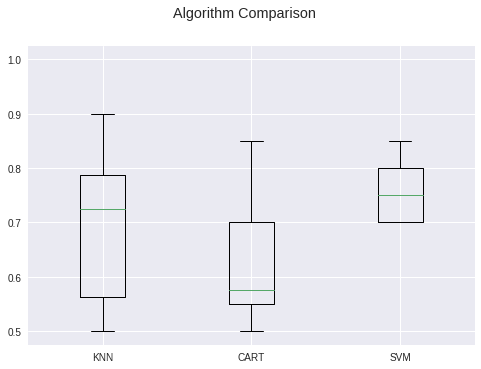

In [48]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(C=100,gamma=.3)))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison




fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)

ax.set_xticklabels(names)
plt.show()

In [0]:
X_train.shape

(100, 11)

Confusion matrix, without normalization
[[45  6]
 [18 31]]
Normalized confusion matrix
[[0.88 0.12]
 [0.37 0.63]]


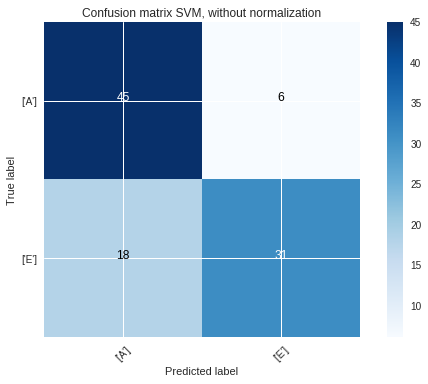

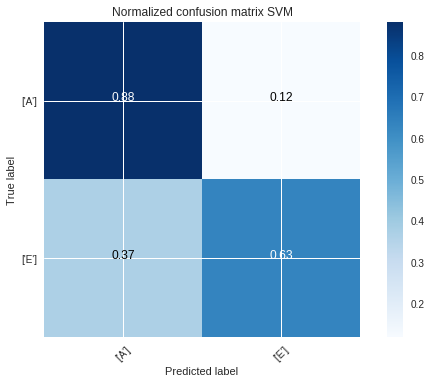

In [49]:
import itertools
from sklearn import svm
from sklearn.metrics import confusion_matrix
class_names=np.array([["A"], ["E"]])

classifier = SVC(C=100,gamma=.2)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix SVM, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix SVM')

plt.show()

Text(0.5, 0, 'False Positive Rate')

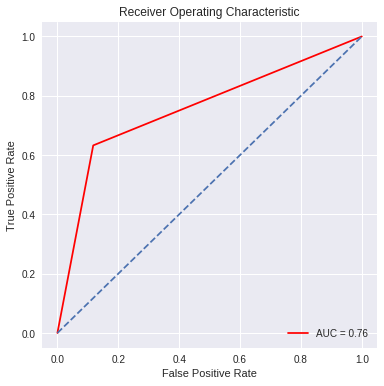

In [50]:
from sklearn import metrics
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [0]:
#@title ICA__Split arrays or matrices into random train and test subsets

X = TotalDataset_ica[['f1','f2','f3','f4','f5','f6','f7','f8']]
y = TotalDataset_ica[['class']]
X = np.asarray(X)
y = np.asarray(y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

KNN: 0.910000 (0.124097)
CART: 0.920000 (0.064031)
NB: 0.985000 (0.032016)
SVM: 0.995000 (0.015000)


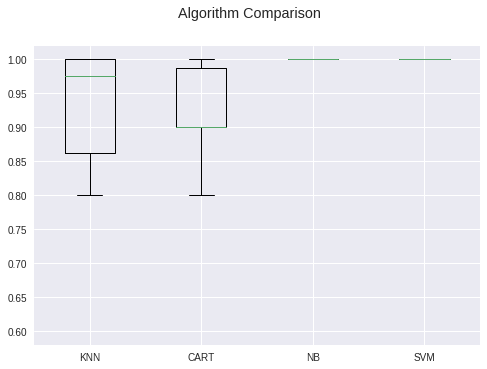

In [53]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(C=100,gamma=.2)))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison




fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)

ax.set_xticklabels(names)
plt.show()

Confusion matrix, without normalization
[[50  1]
 [ 0 49]]
Normalized confusion matrix
[[0.98 0.02]
 [0.   1.  ]]


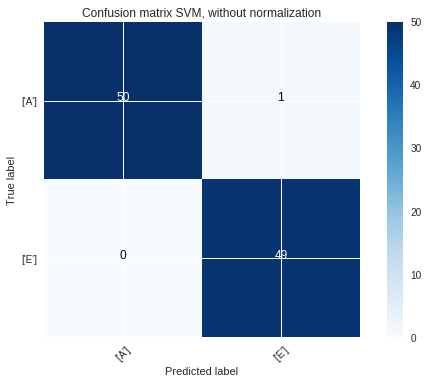

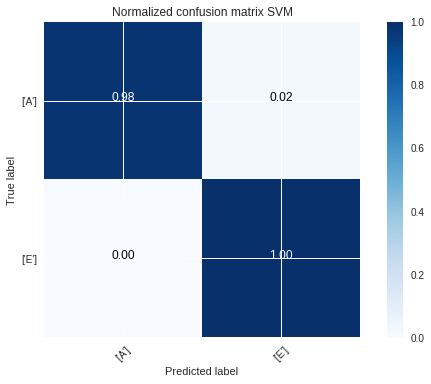

In [54]:
import itertools
from sklearn import svm
from sklearn.metrics import confusion_matrix
class_names=np.array([["A"], ["E"]])

classifier = SVC(C=100,gamma=.2)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix SVM, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix SVM')

plt.show()

Text(0.5, 0, 'False Positive Rate')

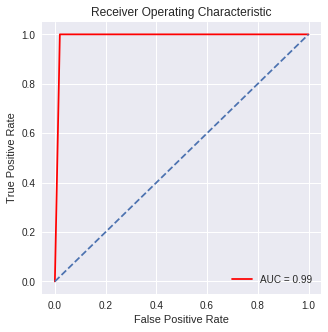

In [55]:
#@title ICA AUC { form-width: "20%" }
from sklearn import metrics
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [0]:
#@title LDA__Split arrays or matrices into random train and test subsets

X = TotalDataset_lda[['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16']]
y = TotalDataset_lda[['class']]
X = np.asarray(X)
X_norm = (X - X.min())/(X.max() - X.min())
y = np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [0]:
X_test.shape

(100, 16)

In [0]:
#@title n_components=??? { form-width: "20%" }
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test) 

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
 
# Predicting the Test set results
y_pred = classifier.predict(X_test)



In [63]:
X_test.shape

(100, 1)

Confusion matrix, without normalization
[[ 9 42]
 [19 30]]
Normalized confusion matrix
[[0.18 0.82]
 [0.39 0.61]]


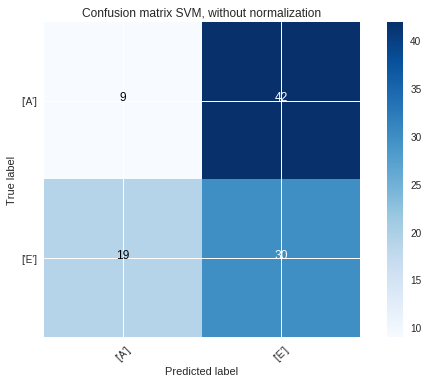

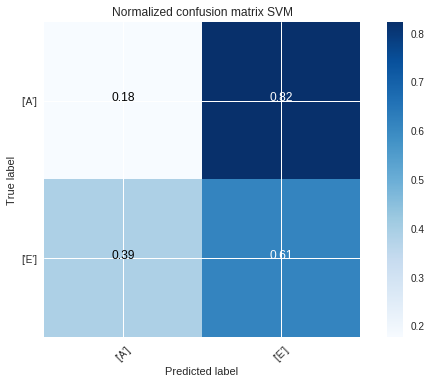

In [86]:
#@title RandomForestClassifier+LDA { form-width: "30%" }
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
y_pred = classifier.fit(X_train, y_train).predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix SVM, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix SVM')

plt.show()

KNN: 0.595000 (0.172409)
CART: 0.905000 (0.052202)
NB: 0.190000 (0.215407)
SVM: 0.355000 (0.121347)


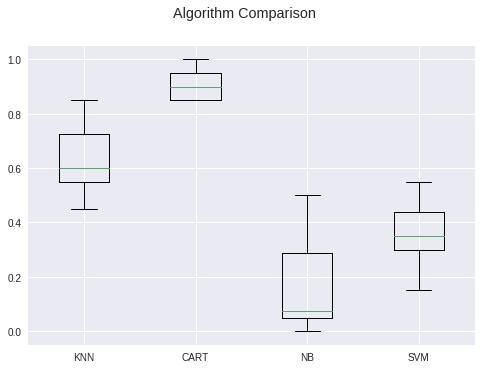

In [87]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(C=10,gamma=.01)))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison




fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)

ax.set_xticklabels(names)
plt.show()

In [0]:
X.shape

(200, 17)

Text(0.5, 0, 'False Positive Rate')

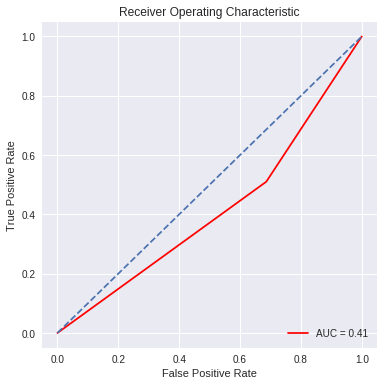

In [89]:
#@title LDA AUC { form-width: "20%" }
from sklearn import metrics
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Confusion matrix, without normalization
[[ 9 42]
 [18 31]]
Normalized confusion matrix
[[0.18 0.82]
 [0.37 0.63]]


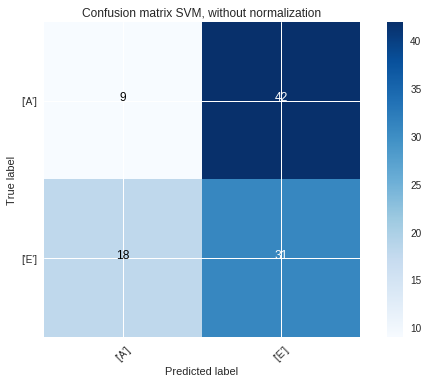

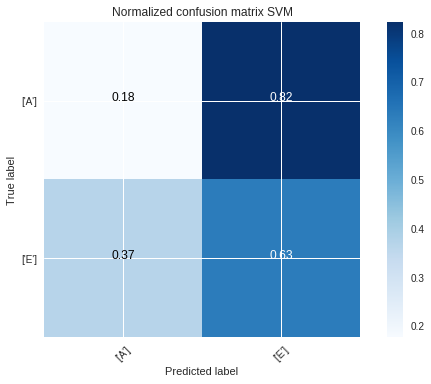

In [90]:
import itertools
from sklearn import svm
from sklearn.metrics import confusion_matrix
class_names=np.array([["A"], ["E"]])

classifier = SVC(C=100,gamma=.2)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix SVM, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix SVM')

plt.show()